In [3]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import the dataset
data=pd.read_csv(r'C:\Users\smohite\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1", engine = 'python')

In [4]:
data.shape

(181691, 135)

In [5]:

data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# To check null values
data.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

In [7]:

#Here we are dropping the null values
data.drop('approxdate', axis = 1, inplace = True)
data.drop('related', axis = 1, inplace = True)

MemoryError: 

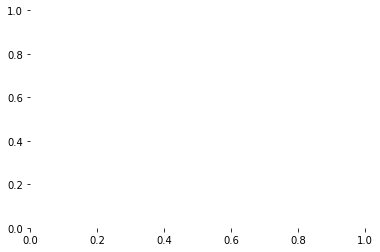

In [9]:
sns.heatmap(data.isnull(), cmap = 'viridis')

In [10]:

datanew = data.country_txt.value_counts().reset_index().rename(columns = {'index': 'Country Name'})
datanew.columns.values[1] = 'Count of Attacks'
datanew.head()

,Country Name,Count of Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


Text(0.5, 1.0, 'Top 10 countries with highest attack count')

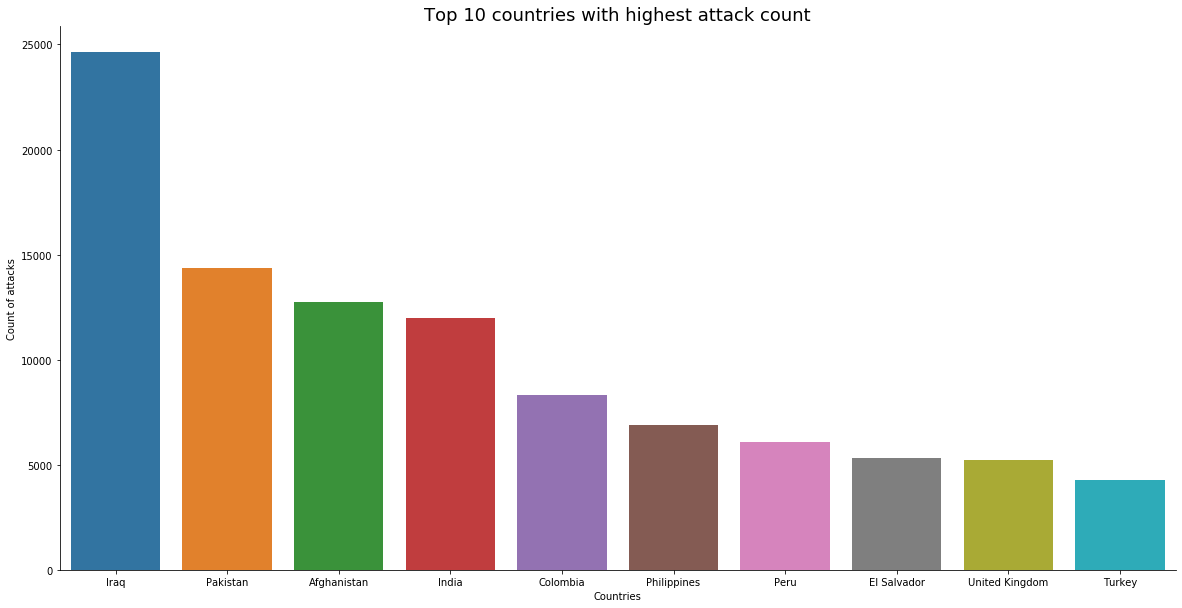

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
sns.despine()
top10 = datanew.head(10)
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2})
sns.barplot(x = "Country Name", y = "Count of Attacks", data = top10)
ax.set_ylabel(ylabel = 'Count of attacks')
ax.set_xlabel(xlabel = 'Countries')
ax.set_title('Top 10 countries with highest attack count')

([<matplotlib.patches.Wedge at 0xf638d0>,
 [Text(0.8572129232221721, 0.8397535378079086, 'Iraq'),
  Text(-0.46003379503917613, 0.9991841208815588, 'Pakistan'),
  Text(-1.0550950330500464, 0.3110859547345747, 'Afghanistan'),
  Text(-0.9705026126165458, -0.5178075693773307, 'India'),
  Text(-0.47157142152288667, -0.9937909208696183, 'Colombia'),
  Text(0.03916882103405774, -1.0993024167438195, 'Philippines'),
  Text(0.473259188827646, -0.9929882880428141, 'Peru'),
  Text(0.7920971400527258, -0.7632706733002996, 'El Salvador'),
  Text(0.9976589322052719, -0.46333212169138116, 'United Kingdom'),
  Text(1.0899859849122417, -0.14808967788097394, 'Turkey')],
 [Text(0.5000408718796003, 0.4898562303879466, '24.7%'),
  Text(-0.2509275245668233, 0.5450095204808502, '14.4%'),
  Text(-0.5755063816636616, 0.1696832480370407, '12.7%'),
  Text(-0.5293650614272067, -0.2824404923876349, '12.0%'),
  Text(-0.25722077537612, -0.5420677750197918, '8.3%'),
  Text(0.021364811473122403, -0.5996195000420833, '6

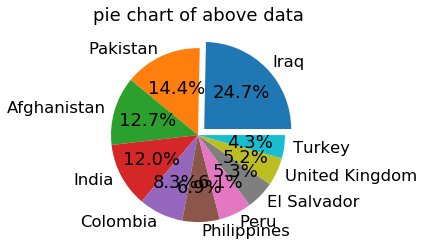

In [12]:
plt.title("pie chart of above data")
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(top10['Count of Attacks'], labels = top10['Country Name'], explode = explode, autopct = "%1.1f%%")

Text(0.5, 1.0, 'Top 10 Targets')

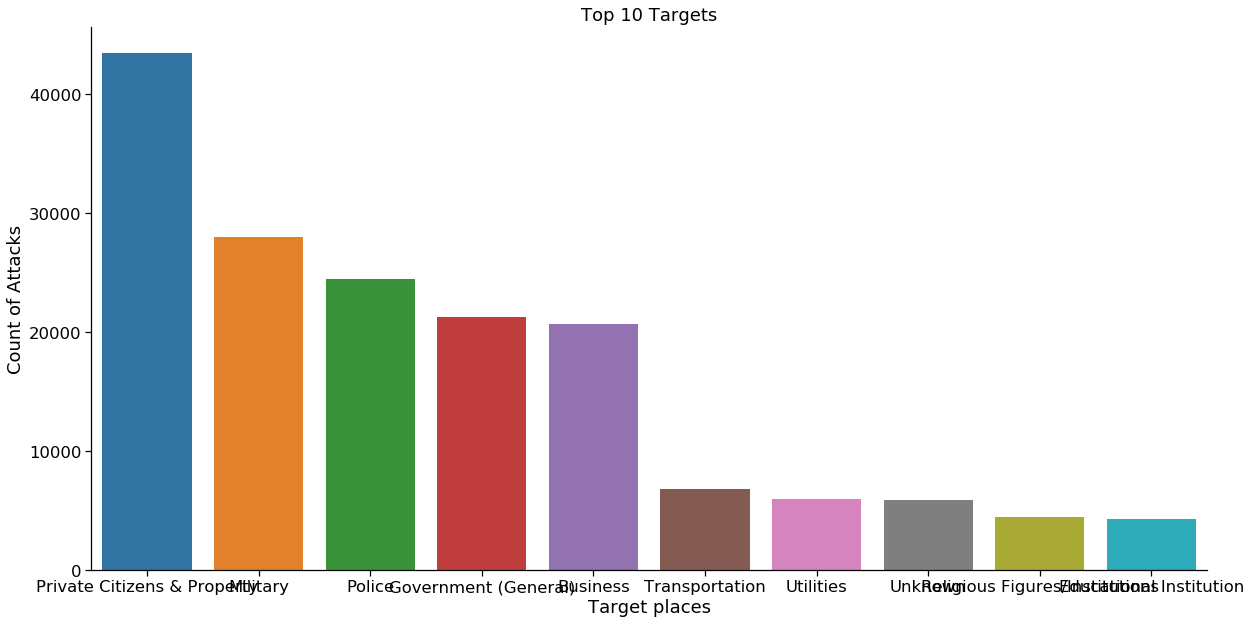

In [13]:
target_type = data['targtype1_txt'].value_counts().reset_index().rename(columns = {'index':'Target Types'})
target_type.columns.values[1] = 'Count'
fig, ax = plt.subplots(figsize = (20,10))
sns.despine()
sns.barplot(x = 'Target Types', y = 'Count', data = target_type.head(10))
ax.set_ylabel(ylabel = 'Count of Attacks')
ax.set_xlabel(xlabel = 'Target places')
ax.set_title('Top 10 Targets')
#This graph shows us which places are most targeted by terrorism

In [14]:

years = data['iyear'].value_counts().reset_index()
years.columns.values[1] = 'Count of Attacks'
years.head()
#This is a year wise analysis of attacks

,index,Count of Attacks
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900


In [15]:

weapons = data['weaptype1_txt'].value_counts().reset_index()
weapons.columns.values[1] = 'Count of Attacks'
weapons.shape

(12, 2)

Text(0.5, 1.0, 'Graph of weapons used for Terrorism')

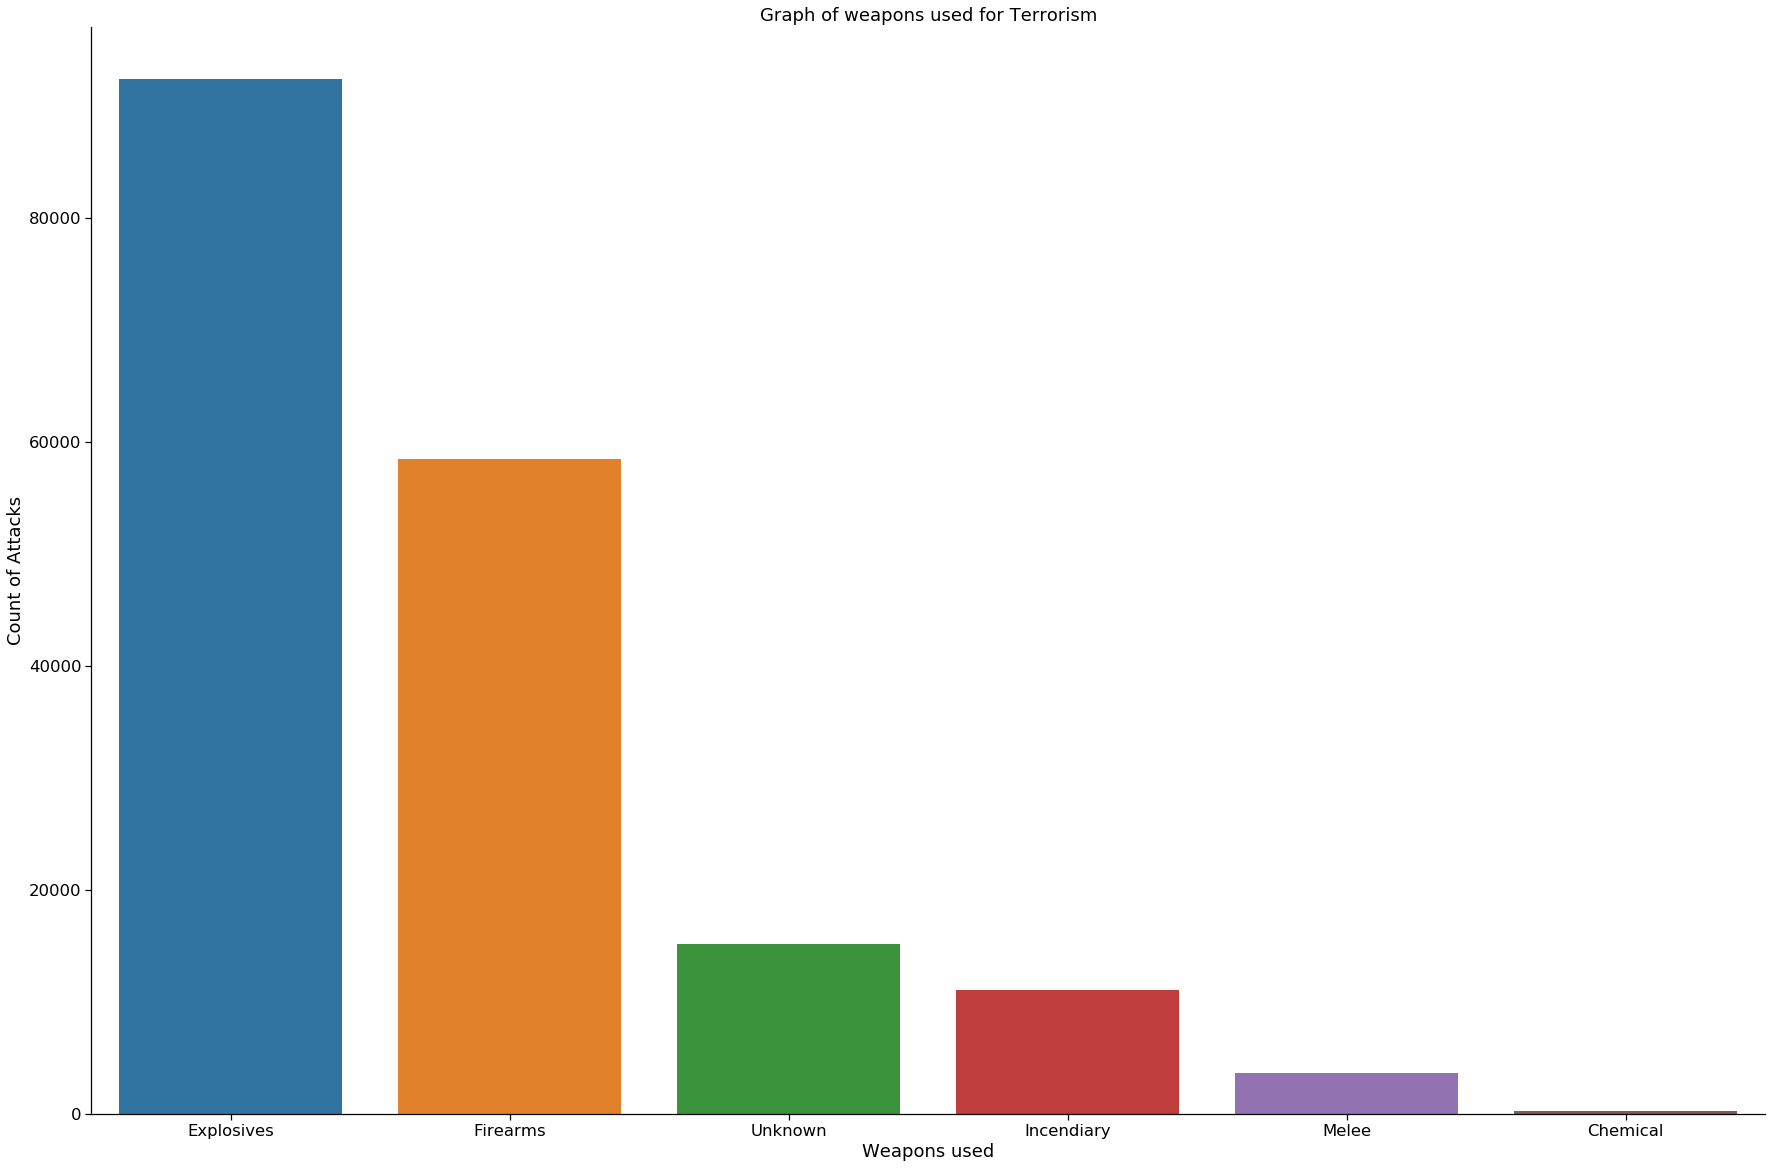

In [17]:
fig, ax = plt.subplots(figsize = (30,20))
sns.despine()
sns.barplot(x = 'index', y = 'Count of Attacks', data = weapons.head(6))
ax.set_ylabel(ylabel = 'Count of Attacks')
ax.set_xlabel(xlabel = 'Weapons used')
ax.set_title('Graph of weapons used for Terrorism')
#From this graph, we conclude that 'explosives' are the type of weapons most used for Terrorism followed by 'firearms'

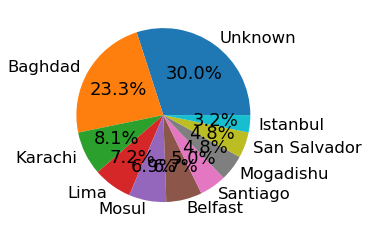

In [18]:
topcity = data.city.value_counts().reset_index().rename(columns = {'index': 'City Name'})
topcity.columns.values[1] = 'Count of Attacks'
topcity = topcity.head(10)
plt.pie(topcity['Count of Attacks'], labels = topcity['City Name'], autopct = '%1.1f%%')
plt.show()
#This is a city wise analysis of places that are attacked with the highest being that of 'Baghdad' followed by 'Karachi'

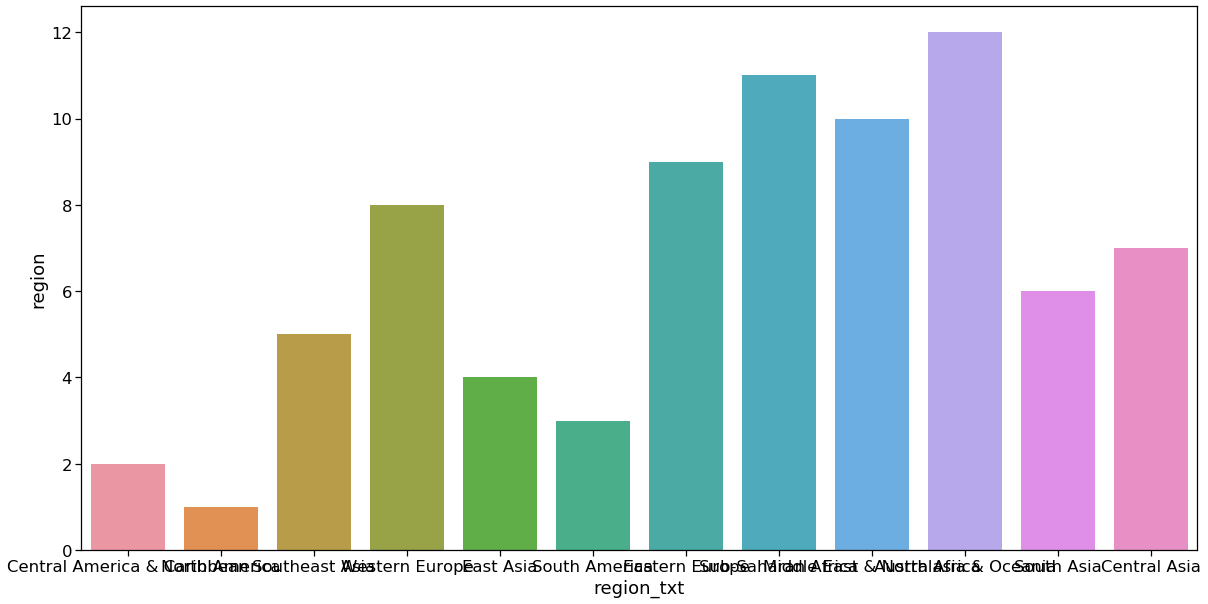

In [19]:
#This is a region wise analysis of Terrosism attacks 
plt.figure(figsize = (20,10))
sns.barplot(x = 'region_txt', y = 'region', data = data)

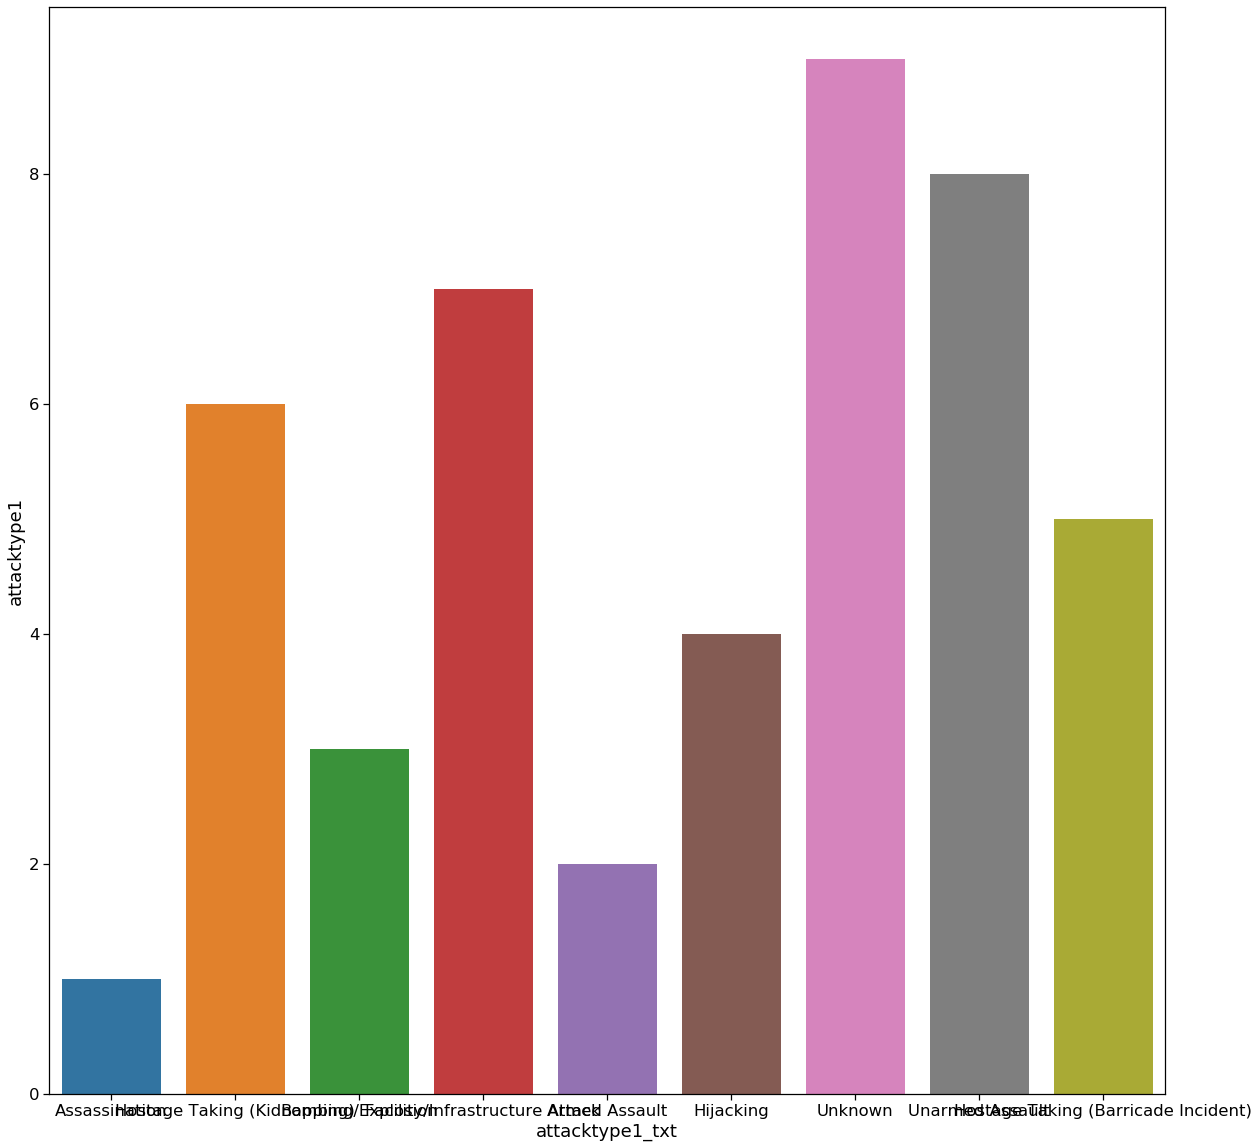

In [20]:
plt.figure(figsize = (20,20))
sns.barplot(x = 'attacktype1_txt', y = 'attacktype1', data = data)
#Below is the analysis of the type of attack of terrorism where 'Unarmed assults' are the 2nd highest